In [1]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime, timedelta
from pprint import pprint

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.types import Date


In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
base.classes.keys()
# https://www.learnpython.org/en/Classes_and_Objects   (understand difference between object and classes)

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station
station

sqlalchemy.ext.automap.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)
session

# Exploratory Climate Analysis

In [10]:
cmd = """SELECT date
FROM measurement
"""
print(pd.read_sql(cmd, con=engine))


# Design a query to retrieve the last 12 months of precipitation data and plot the results


# # Calculate the date 1 year ago from the last data point in the database

# # Perform a query to retrieve the data and precipitation scores

# # Save the query results as a Pandas DataFrame and set the index to the date column

# # Sort the dataframe by date

# # Use Pandas Plotting with Matplotlib to plot the data

             date
0      2010-01-01
1      2010-01-02
2      2010-01-03
3      2010-01-04
4      2010-01-06
...           ...
19545  2017-08-19
19546  2017-08-20
19547  2017-08-21
19548  2017-08-22
19549  2017-08-23

[19550 rows x 1 columns]


In [11]:
last_date = session.query(func.max(measurement.date)).first()[0]
print("The last day data was collected was: " + last_date)

The last day data was collected was: 2017-08-23


In [12]:
type(last_date)

str

In [13]:
date_time_obj = dt.datetime.strptime(last_date, '%Y-%m-%d')
date_time_obj

datetime.datetime(2017, 8, 23, 0, 0)

In [14]:
type(date_time_obj)
# convert this one to datetime.delta for te

datetime.datetime

In [15]:
type(dt.timedelta(days=365))

datetime.timedelta

In [16]:
# # Calculate the date 1 year ago from the last data point in the database
one_year_ago = date_time_obj - timedelta(days=365)
print("The last year of data collection began: " + str(one_year_ago))

The last year of data collection began: 2016-08-23 00:00:00


In [30]:
one_year_ago_query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago,  measurement.date <= last_date)
# one_year_ago_query_df = pd.DataFrame(one_year_ago_query)
precip = list(np.ravel(one_year_ago_query))
precip

In [18]:
last_year_df = pd.read_sql(one_year_ago_query.statement, one_year_ago_query.session.bind)
print("This dataframe includes the last year of data via multiple session queries : ")
last_year_df

This dataframe includes the last year of data via multiple session queries : 


,id,station,date,prcp,tobs
0,2365,USC00519397,2016-08-24,0.08,79.0
1,2366,USC00519397,2016-08-25,0.08,80.0
2,2367,USC00519397,2016-08-26,0.00,79.0
3,2368,USC00519397,2016-08-27,0.00,77.0
4,2369,USC00519397,2016-08-28,0.01,78.0
...,...,...,...,...,...
2218,19546,USC00516128,2017-08-19,0.09,71.0
2219,19547,USC00516128,2017-08-20,NaN,78.0
2220,19548,USC00516128,2017-08-21,0.56,76.0
2221,19549,USC00516128,2017-08-22,0.50,76.0


In [19]:
# # Perform a query to retrieve the data and precipitation scores
# # Save the query results as a Pandas DataFrame and set the index to the date column
# # Sort the dataframe by date
prcp_data_df = pd.read_sql("SELECT date, prcp FROM measurement WHERE date > '2016-08-23'", con=engine)
print("This dataframe includes the last year of data from via single line query: ")
prcp_data_df

This dataframe includes the last year of data from via single line query: 


,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


## Use Pandas Plotting with Matplotlib to plot the data

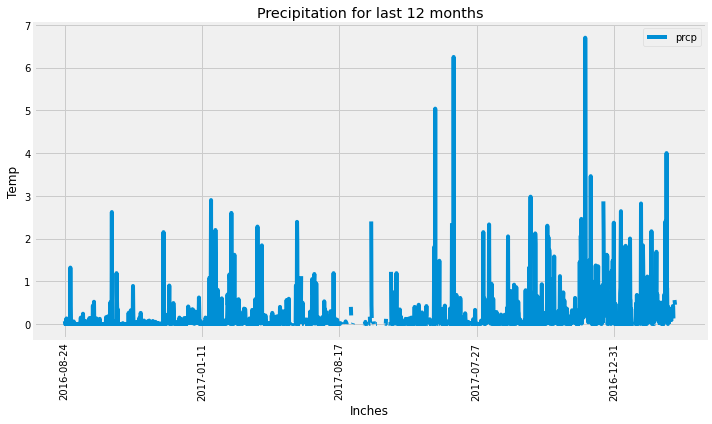

In [20]:
prcp_data_df.plot("date", "prcp", rot=90, figsize=(10,6), title="Precipitation for last 12 months")
plt.xticks()
plt.xlabel("Inches")
plt.ylabel("Temp")
plt.tight_layout()
plt.savefig("images/12_mo_prcp.png")


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_summary = prcp_data_df[["prcp"]].describe()
print("The summary of precip data from the last year is: ") 
prcp_summary

The summary of precip data from the last year is: 


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(station).count()
station_count

9

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activity_count = (session.query(measurement.station, func.count(measurement.date)).group_by(measurement.station).order_by(func.count(measurement.date).desc()).all())
print("This is the activity count: ")
pprint(activity_count)

This is the activity count: 
[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]


In [24]:
active_stations_df = pd.DataFrame(activity_count, columns=["Station", "Measurement Count"], )
active_stations_df

,Station,Measurement Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [25]:
most_active = (session.query(measurement.station, func.count(measurement.date)).group_by(measurement.station).order_by(func.count(measurement.date).desc()).first())
print(most_active)

('USC00519281', 2772)


In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = session.query(measurement.station, station.name, 
                                     func.min(measurement.tobs),
                                     func.max(measurement.tobs), 
                                     func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281')

pd.DataFrame(most_active, columns=["Station", "Station Name", "min-temp", "max-temp", "avg-temp"])

,Station,Station Name,min-temp,max-temp,avg-temp
0,USC00519281,"WAIKIKI 717.2, HI US",54.0,85.0,71.663781


In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_last12 = session.query(measurement.date, measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= one_year_ago,  measurement.date <= last_date)

most_active_last12_df = pd.DataFrame(most_active_last12, columns=["date", "temp"])
most_active_last12_df

,date,temp
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


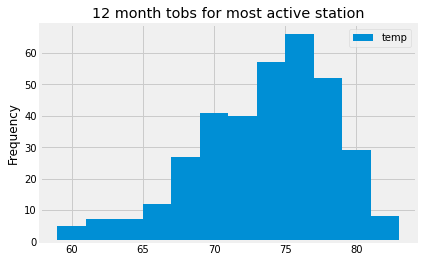

In [28]:

most_active_last12_df.plot.hist("tobs", bins=12)
plt.title("12 month tobs for most active station")
plt.savefig("images/12_mo_histogram.png")

## Bonus Challenge Assignment

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_calc = calc_temps('2016-08-24', '2017-08-18')
print(trip_calc)

[(58.0, 74.53786848072562, 87.0)]


In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [32]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [33]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [34]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [35]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [36]:
# Plot the daily normals as an area plot with `stacked=False`


In [39]:
last_date_tobs = session.query(func.max(measurement.date)).first()[0]
date_time_obj_tobs = dt.datetime.strptime(last_date_tobs, '%Y-%m-%d')
one_year_ago_tobs = date_time_obj_tobs - timedelta(days=365)
most_active_last12 = session.query(measurement.tobs, measurement.date).filter(measurement.station == 'USC00519281').filter(measurement.date >= one_year_ago_tobs,  measurement.date <= last_date_tobs).all()
        # most_active_last12_1_df = pd.DataFrame(most_active_last12, columns=["date", "temp"])
temps = list(np.ravel(most_active_last12))
temps

NameError: name 'header' is not defined

In [36]:
last_date = session.query(func.max(measurement.date)).first()[0]
date_time_obj = dt.datetime.strptime(last_date, '%Y-%m-%d')
one_year_ago = date_time_obj - timedelta(days=365)
one_year_ago_query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago,  measurement.date <= last_date).all()
precip = list(np.ravel(one_year_ago_query))
precip

['2016-08-24',
 0.08,
 '2016-08-25',
 0.08,
 '2016-08-26',
 0.0,
 '2016-08-27',
 0.0,
 '2016-08-28',
 0.01,
 '2016-08-29',
 0.0,
 '2016-08-30',
 0.0,
 '2016-08-31',
 0.13,
 '2016-09-01',
 0.0,
 '2016-09-02',
 0.0,
 '2016-09-03',
 0.0,
 '2016-09-04',
 0.03,
 '2016-09-05',
 None,
 '2016-09-06',
 None,
 '2016-09-07',
 0.05,
 '2016-09-08',
 0.0,
 '2016-09-09',
 0.03,
 '2016-09-10',
 0.0,
 '2016-09-11',
 0.05,
 '2016-09-12',
 0.0,
 '2016-09-13',
 0.02,
 '2016-09-14',
 1.32,
 '2016-09-15',
 0.42,
 '2016-09-16',
 0.06,
 '2016-09-17',
 0.05,
 '2016-09-18',
 0.0,
 '2016-09-19',
 0.0,
 '2016-09-20',
 0.0,
 '2016-09-21',
 0.0,
 '2016-09-22',
 0.02,
 '2016-09-23',
 0.0,
 '2016-09-24',
 0.0,
 '2016-09-25',
 0.0,
 '2016-09-26',
 0.06,
 '2016-09-27',
 0.02,
 '2016-09-28',
 0.0,
 '2016-09-29',
 0.0,
 '2016-09-30',
 0.0,
 '2016-10-01',
 0.0,
 '2016-10-02',
 0.0,
 '2016-10-03',
 0.0,
 '2016-10-04',
 0.0,
 '2016-10-05',
 0.0,
 '2016-10-06',
 0.0,
 '2016-10-07',
 0.0,
 '2016-10-08',
 0.0,
 '2016-10-09',
 